In [224]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

In [132]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'adult/adult.data', header=None, sep=', ', engine='python')

In [143]:
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
data_cor=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=names)
data_cor

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


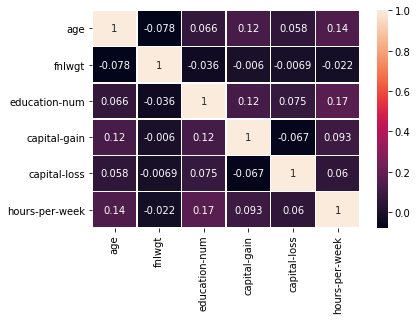

In [155]:
import seaborn as sns

correlations=data_cor.corr(method='spearman')

#vosualizing the corelation of variables in the dataset
sns.heatmap(correlations,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

The correlation matrix shows the feature to feature and feature to label pearson correlations of the variables. 
the color gradients used mark the correlation between the variables. the color shade makes the relationship eveident. 
the evident features can then be studied further to study the districution of values. the color shades from light to dark show the most correlated to the least correlated variables

In [89]:
print ("Number of features : {}".format(len(dataset.columns.values)))
print ("Number of sample : {}".format(dataset.shape[0]))

Number of features : 15
Number of sample : 32561


In [55]:
dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 
              'education-num', 'marital-status', 'occupation', 
              'relationship', 'race', 'sex', 'capital-gain', 
              'capital-loss', 'hours-per-week', 'native-country', 
              'label']
features = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country']

#display(dataset.head(15))


In [61]:
label_le = LabelEncoder()
dataset['label'] = label_le.fit_transform(dataset['label'].values)

# remove rows with missing data
dataset = dataset.replace('?', np.nan)
dataset_drop_row = dataset.dropna()


# one-hot encoding
dataset_drop_row = pd.get_dummies(dataset_drop_row)
display(dataset_drop_row.head(15))

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [127]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Using RFE for feature selection
data_features=dataset_drop_row.drop('label',axis=1)
data_label=dataset_drop_row.label
#define a classifier
model = LogisticRegression()

#create RFE model to return top 3 attributes
rfe = RFE(model,3)
rfe = rfe.fit(data_features,data_label)


print('\n rfe.ranking:\n',rfe.ranking_)
#print('\n features:\n',data_features.columns.values)


 rfe.ranking:
 [ 83  86  49  85  84  78  29  92  72  33  50  45  13  62  57  59  75  73
  63  60  48  58  77   1  61  53  54   1  64  40   2   1  39  31  38  41
  80  96  82  10  15  14  34   7   5  11  26  23  22  76  55  74  12   3
  51  17  25  71  69  19  70  18  46  95  93 102   6  67   8  44  27  65
  37  56  32  24  36  99  94  91  98  47  81  88  42  35  66  90   4  20
   9  21 100  79  52  30 101  28  43  97  87  68  16  89]


In [126]:
from sklearn.ensemble import ExtraTreesClassifier
#define and fit a ExtraTreeClassifier to the data
model = ExtraTreesClassifier()
model.fit(data_features,data_label)

#display the feature importance


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
import matplotlib.pyplot as plt
#bar plot of feature importance
values = model.feature_importances_
values=values[:5]
#values
pos = np.arange(5) + 0.02

([<matplotlib.axis.YTick at 0x24574ef94e0>,
 <a list of 5 Text yticklabel objects>)

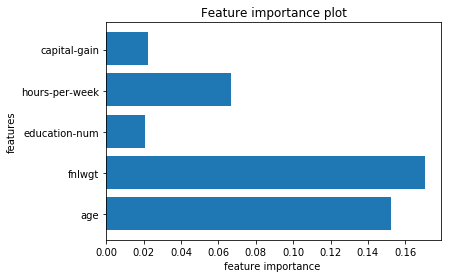

In [156]:

plt.barh(pos,values)
plt.title('Feature importance plot')
plt.xlabel('feature importance ')
plt.ylabel('features')
plt.yticks(np.arange(5),('age','fnlwgt','education-num','hours-per-week','capital-gain'))


The top three features according the graph are fnlwgt,age,hours-per-week

Refering to slide 13 from the marks presentation the bar graphs uses the marks-lines and position. It utilizes the area both vertically and horizontally. The length of the bar indicates the score of the feature importance and hence helps in comparing. The area of the graph is utilized accordingly thus making the length and area proportionate.

The two graphs help in recognizing the most effective features. the model to further improve the accuracy can thus be worked upon using these recognized features.

In [62]:
X = dataset_drop_row.drop('label', axis=1).values
y = dataset_drop_row['label'].values


In [65]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=0)

print(X_train.shape, X_test.shape)

(24129, 104) (6033, 104)


In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

[0.76180613 0.76180613 0.76460837 0.76958143 0.75466225 0.7670949
 0.77123912 0.76451078 0.76741294 0.76616915]


In [67]:
from sklearn.grid_search import GridSearchCV

C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [210]:
k_range = list(range(1, 10))
param_grid =  {"n_neighbors": np.arange(1, 11), "p": [1,2]}

In [211]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,scoring="accuracy")

In [212]:
grid_fit=grid.fit(X_train, y_train)


In [226]:
grid_fit.grid_scores_

[mean: 0.72879, std: 0.00638, params: {'n_neighbors': 1, 'p': 1},
 mean: 0.72108, std: 0.00807, params: {'n_neighbors': 1, 'p': 2},
 mean: 0.78122, std: 0.00459, params: {'n_neighbors': 2, 'p': 1},
 mean: 0.77749, std: 0.00539, params: {'n_neighbors': 2, 'p': 2},
 mean: 0.75718, std: 0.00730, params: {'n_neighbors': 3, 'p': 1},
 mean: 0.75117, std: 0.00688, params: {'n_neighbors': 3, 'p': 2},
 mean: 0.78354, std: 0.00507, params: {'n_neighbors': 4, 'p': 1},
 mean: 0.77836, std: 0.00480, params: {'n_neighbors': 4, 'p': 2},
 mean: 0.77098, std: 0.00438, params: {'n_neighbors': 5, 'p': 1},
 mean: 0.76489, std: 0.00446, params: {'n_neighbors': 5, 'p': 2},
 mean: 0.78532, std: 0.00365, params: {'n_neighbors': 6, 'p': 1},
 mean: 0.78254, std: 0.00272, params: {'n_neighbors': 6, 'p': 2},
 mean: 0.77740, std: 0.00331, params: {'n_neighbors': 7, 'p': 1},
 mean: 0.77430, std: 0.00393, params: {'n_neighbors': 7, 'p': 2},
 mean: 0.78549, std: 0.00209, params: {'n_neighbors': 8, 'p': 1},
 mean: 0.7

In [72]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.7842015831571967
{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


In [231]:
# view the complete results
grid_fit.grid_scores_


[mean: 0.72879, std: 0.00638, params: {'n_neighbors': 1, 'p': 1},
 mean: 0.72108, std: 0.00807, params: {'n_neighbors': 1, 'p': 2},
 mean: 0.78122, std: 0.00459, params: {'n_neighbors': 2, 'p': 1},
 mean: 0.77749, std: 0.00539, params: {'n_neighbors': 2, 'p': 2},
 mean: 0.75718, std: 0.00730, params: {'n_neighbors': 3, 'p': 1},
 mean: 0.75117, std: 0.00688, params: {'n_neighbors': 3, 'p': 2},
 mean: 0.78354, std: 0.00507, params: {'n_neighbors': 4, 'p': 1},
 mean: 0.77836, std: 0.00480, params: {'n_neighbors': 4, 'p': 2},
 mean: 0.77098, std: 0.00438, params: {'n_neighbors': 5, 'p': 1},
 mean: 0.76489, std: 0.00446, params: {'n_neighbors': 5, 'p': 2},
 mean: 0.78532, std: 0.00365, params: {'n_neighbors': 6, 'p': 1},
 mean: 0.78254, std: 0.00272, params: {'n_neighbors': 6, 'p': 2},
 mean: 0.77740, std: 0.00331, params: {'n_neighbors': 7, 'p': 1},
 mean: 0.77430, std: 0.00393, params: {'n_neighbors': 7, 'p': 2},
 mean: 0.78549, std: 0.00209, params: {'n_neighbors': 8, 'p': 1},
 mean: 0.7

In [221]:
# examine the best model
print(grid_fit.best_score_)
print(grid_fit.best_params_)



0.7878072029508061
{'n_neighbors': 10, 'p': 1}


In [217]:
knn=KNeighborsClassifier(n_neighbors=10, weights='uniform',p=1)

In [218]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=1,
           weights='uniform')

In [219]:
from sklearn import metrics
y_predict=knn.predict(X_test)
scores = []
scores.append(metrics.accuracy_score(y_test,y_predict))
print("Accuracy is:{}".format(max(scores)))

Accuracy is:0.7898226421349246


In [185]:

#from sys import getsizeof
#getsizeof(y_predict)
#getsizeof(y_test)

96

In [157]:
k_range=range(1,10)
cv_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

Instead of matching the accuracy to the number of folds directly we can study the misclassification error to find out the best number for k for which the misclassification erorr is the least

The optimal number of neighbors is 8


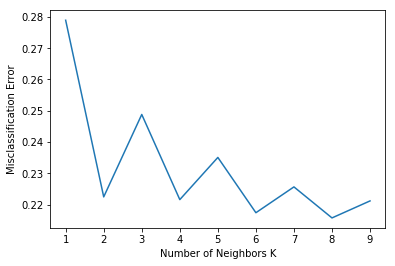

In [163]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_range[MSE.index(min(MSE))]
print ("The optimal number of neighbors is",optimal_k)

# plot misclassification error vs k
plt.plot(k_range, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

KNN:
 confusion matrix
 [[4404  128]
 [1164  337]] 


Confusion matrix plot of KNN classifier


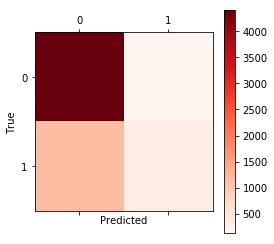


 Classification report 
              precision    recall  f1-score   support

          0       0.79      0.97      0.87      4532
          1       0.72      0.22      0.34      1501

avg / total       0.77      0.79      0.74      6033



In [164]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_predict)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_predict))

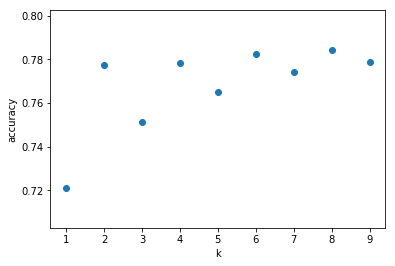

In [172]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, cv_scores)